In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from quantum.gates.one_control_qubit import classic_one_control_qubit
from qiskit import Aer, transpile, assemble
from fractions import Fraction

In [2]:
# Setup parameters
N = 35
a = 3
no_of_shots = 1024

In [3]:
# Execute the circuit for finding period and plot results of the phases
size = len(bin(N).lstrip("0b"))
circuit = classic_one_control_qubit(size, a, N)

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(circuit, aer_sim)
qobj = assemble(t_qc, shots=no_of_shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()

<BarContainer object of 81 artists>

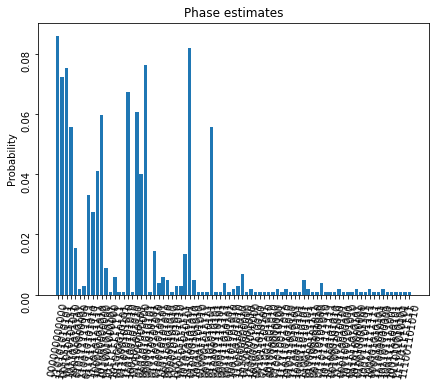

In [4]:
x, y = [], []
sum = 0
for output in counts:
    sum += counts[output]
for output in counts:
    x.append(output[::-1])
    y.append(counts[output]/sum)

fig, ax = plt.subplots(figsize=(7,5))
plt.xticks(rotation=80)
plt.yticks(rotation=90)
plt.title("Phase estimates")
plt.ylabel("Probability")
plt.bar(x, y)

In [5]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output[::-1], 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**(2*size))  # Find corresponding eigenvalue
    measured_phases.append([phase, counts[output]])
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**(2*size)} = {phase:.2f}", counts[output]])
rows.sort(reverse=True, key=lambda x: x[2])
# Print the rows in a table
headers=["Register Output", "Phase", "Counts"]
df = pd.DataFrame(rows, columns=headers)
print(df)

                  Register Output             Phase  Counts
0    000000000000(bin) =   0(dec)     0/4096 = 0.00      88
1   010101010101(bin) = 2730(dec)  2730/4096 = 0.67      84
2   101010101010(bin) = 1365(dec)  1365/4096 = 0.33      78
3   111111111111(bin) = 4095(dec)  4095/4096 = 1.00      77
4   101010101011(bin) = 3413(dec)  3413/4096 = 0.83      74
..                            ...               ...     ...
76  101001111001(bin) = 2533(dec)  2533/4096 = 0.62       1
77  101010011001(bin) = 2453(dec)  2453/4096 = 0.60       1
78  101010110110(bin) = 1749(dec)  1749/4096 = 0.43       1
79  111111101111(bin) = 3967(dec)  3967/4096 = 0.97       1
80  010101100111(bin) = 3690(dec)  3690/4096 = 0.90       1

[81 rows x 3 columns]


In [6]:
rows = []
for _, phase in enumerate(measured_phases):
    frac = Fraction(phase[0]).limit_denominator(N)
    rows.append([phase[0], phase[1], f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Counts", "Fraction", "Guess for r"]
rows.sort(reverse=True, key=lambda x: x[1])
df = pd.DataFrame(rows, columns=headers)
print(df)

       Phase  Counts Fraction  Guess for r
0   0.000000      88      0/1            1
1   0.666504      84      2/3            3
2   0.333252      78      1/3            3
3   0.999756      77      1/1            1
4   0.833252      74      5/6            6
..       ...     ...      ...          ...
76  0.618408       1    13/21           21
77  0.598877       1      3/5            5
78  0.427002       1      3/7            7
79  0.968506       1    31/32           32
80  0.900879       1     9/10           10

[81 rows x 4 columns]
